# Loan Application Status Prediction
## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

**Note: The link of the dataset is below.**

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


### Importing Necessery liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as stats

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
df = pd.read_csv(r"D:\data scienctist\projects\Evolution Projects\Evolution projects data\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


So here we can see The dataset contains the details of Applicants who have applied for loan. 
* This dataset is comprised of 614 rows and 13 columns including one target varibale i.e. 'Loan_Status'. where we need to predict whether the loan of the applicant will be approved or not.
* There are two unique values in the target column Y (yes) and N (no).
* The target variable that is 'Loan_Status' has two classes, hence this is a classification data problem. We will look more into the dataset in the EDA part

##  Exploratory Data Analysis(EDA) & Feature Engineering:

In [3]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


So here we can see the dataset contains different features with different data types.
* There are two types of data namely object type(8 columns) and int64/float64 data type(5 columns).
* We will take care of the object datatype using encoding techniques later.

In [4]:
# checking the null values in the dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

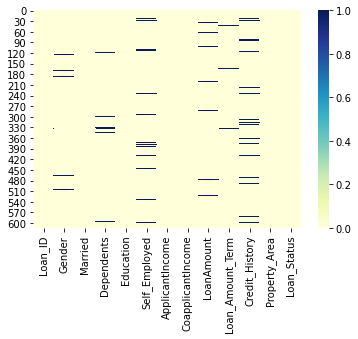

In [5]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="YlGnBu")

* We can see, we have multiple null values in many of our columns. 

In [6]:
for i in df:
    percentage = np.round((df[i].isnull().sum()/614)*100,2)
    print(i,':' , percentage,'%')

Loan_ID : 0.0 %
Gender : 2.12 %
Married : 0.49 %
Dependents : 2.44 %
Education : 0.0 %
Self_Employed : 5.21 %
ApplicantIncome : 0.0 %
CoapplicantIncome : 0.0 %
LoanAmount : 3.58 %
Loan_Amount_Term : 2.28 %
Credit_History : 8.14 %
Property_Area : 0.0 %
Loan_Status : 0.0 %


Above informaions is indicates the percentage of null values present in each column;
* Column 'Credit_History' has most no. of null values (i.e. 8.14%) followed by columns 'Self_Employed' (5.21%), 'LoanAmount'(3.58%) and 'Loan_Amount_Term' (2.28 %)
* columns: 'Loan_ID', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'Property_Area' & 'Loan_Status' have no null values.

In [7]:
# Checking duplicated values

df.duplicated().sum()

0

* Duplicate values are present on our data set, Now lets remove the Null values from our data set to further process.

In [8]:
#Checking the number of unique values in each columns:
df.nunique().to_frame('Number of Unique Values')

,Number of Unique Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


From the above cell we can check the no. of unique values present in each columns.

In [9]:
#Checking the value counts of each of the columns
for i in df.columns:
    print(f""" Column '{i}' :
{df[i].value_counts()}
___________________________________""")

 Column 'Loan_ID' :
LP001066    1
LP001940    1
LP001024    1
LP002297    1
LP002342    1
           ..
LP001974    1
LP002422    1
LP002036    1
LP001213    1
LP002974    1
Name: Loan_ID, Length: 614, dtype: int64
___________________________________
 Column 'Gender' :
Male      489
Female    112
Name: Gender, dtype: int64
___________________________________
 Column 'Married' :
Yes    398
No     213
Name: Married, dtype: int64
___________________________________
 Column 'Dependents' :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
___________________________________
 Column 'Education' :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
___________________________________
 Column 'Self_Employed' :
No     500
Yes     82
Name: Self_Employed, dtype: int64
___________________________________
 Column 'ApplicantIncome' :
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantInco

Above tabes showes us, the value counts of each unique value in each table:
* Column 'Loan_ID' has all unique value and that is obvious because its the loan id no., so we need to drop this column as it has no use in our prediction.
* column 'Gender' has more count of 'Male' so we should fill nan values with male (categorical column).
* the same logic will be applicable for columns: 'Married', 'Dependents',  'Self_Employed', 'Loan_Amount_Term', 'Credit_History' because these are categorical columns.
* from above we can say that the data is imbalanced, so will balance the data before model building.

#### data Preprocessing: part 1: filling NaN

In [10]:
df.drop('Loan_ID', axis=1, inplace = True)

In [11]:
# Filling Null values with maximum count because these are categorical columns.

df['Gender'] = df['Gender'].fillna('Male')
df['Married'] = df['Married'].fillna('Yes')
df['Dependents']= df['Dependents'].fillna('0')
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360)
df['Credit_History']= df['Credit_History'].fillna(1)

In [12]:
# Filling Null values for Numerical columns:

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [13]:
# Rechecking the null values in the dataframe
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

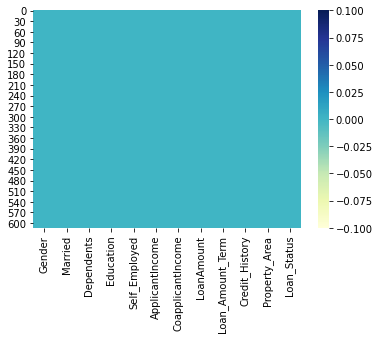

In [14]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="YlGnBu")

* We can see, we have sucessfully removed the NaN values from our dataset.

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Statistical Analysis of the DataSet:

In [16]:
df.describe() #numerical columns only

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


* This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

**Checking the 'categorical' and 'numerical columns':**

In [17]:
# checking for categorical and numerical columns

categorical_col=[]
numerical_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
        
print(f"""** Categorical Columns: {categorical_col}

-----------------------------------------------------------------------------------------------------------------------

** Numerical Columns: {numerical_col}""")

** Categorical Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

-----------------------------------------------------------------------------------------------------------------------

** Numerical Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## Data Visualization:

### 1. Univariate Analysis:
   **a) Categorical columns**

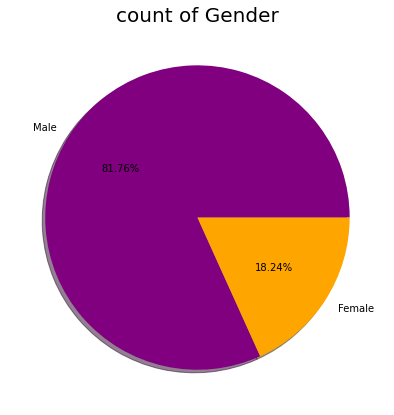

In [18]:
# 1. Visualize the count of gender of the people
labels='Male','Female'
fig, ax = plt.subplots(figsize=(7,7))
colors = ["purple","orange"]
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title('count of Gender',fontsize=20)
plt.show()

* The count of Male is high and has around 81% and only 18.24% of females are there.

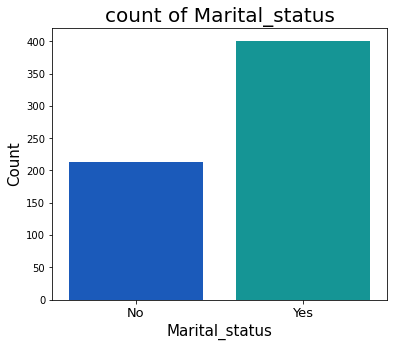

In [19]:
# 2. Visualizing the Marital_status
plt.figure(figsize=(6,5))
sns.countplot(df['Married'],palette = 'winter')

plt.title('count of Marital_status',fontsize=20)
plt.xlabel('Marital_status',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* Here we can see that the population of married people are higher. 

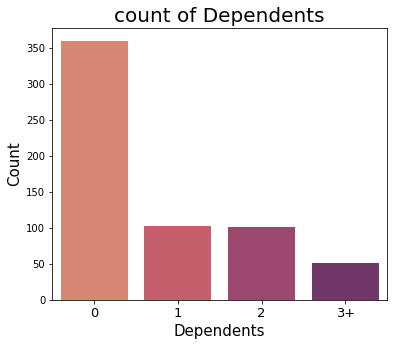

In [20]:
# 3. Visualizing the count Dependents
plt.figure(figsize=(6,5))
sns.countplot(df['Dependents'],palette = 'flare')

plt.title('count of Dependents',fontsize=20)
plt.xlabel('Dependents',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* The Population which have Number of dependents= 0 is maximum in our data set.

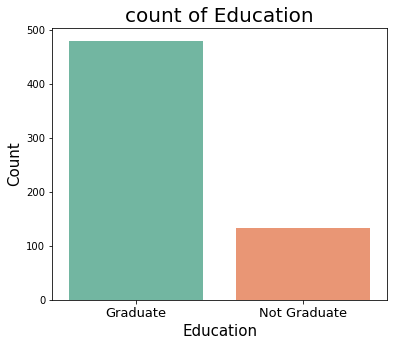

In [21]:
# 4. Visualizing the Education
plt.figure(figsize=(6,5))
sns.countplot(df['Education'],palette = 'Set2')

plt.title('count of Education',fontsize=20)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* here we can see that the most of the pppulation is graduated.

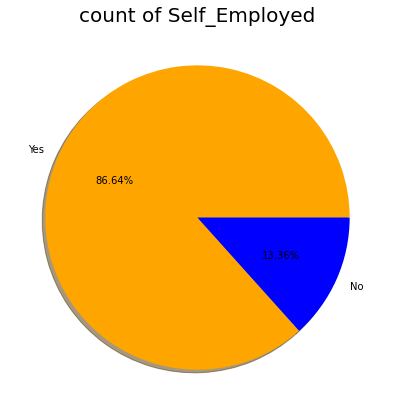

In [22]:
# 5. Visualize the count of gender of the people
labels='Yes','No'
fig, ax = plt.subplots(figsize=(7,7))
colors = ["orange","blue"]
ax.pie(df['Self_Employed'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title('count of Self_Employed',fontsize=20)
plt.show()

* The count of self employed people is high and has around 86% of total population. while the people who are not self employed are 13.36%.

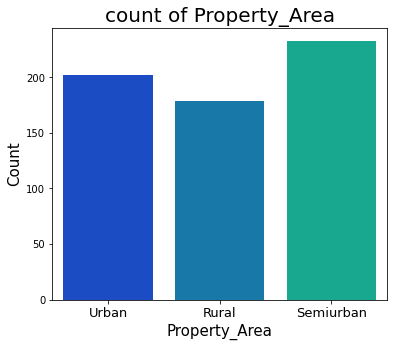

In [23]:
# 6. Visualizing the Property_Area
plt.figure(figsize=(6,5))
sns.countplot(df['Property_Area'],palette = 'winter')

plt.title('count of Property_Area',fontsize=20)
plt.xlabel('Property_Area',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

* Here it is clear that, The people who are live in Semiurban areas have highest count followed by Urban, and then rural.

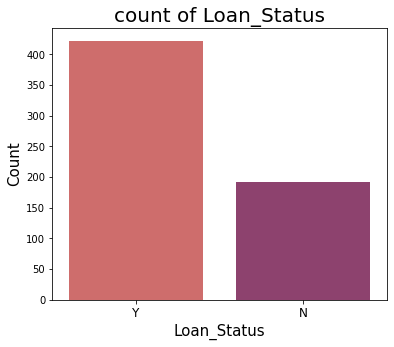

In [24]:
#Visualize the whether the Loan_Status is Yes or No
plt.figure(figsize=(6,5))
sns.countplot(df["Loan_Status"],palette = 'flare')

plt.title('count of Loan_Status',fontsize=20)
plt.xlabel('Loan_Status',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

* We see that there are 2 classes in target variable, and the dataset is imbalanced. We will have to balance the datset for modelling.

**b) Numerical columns:**

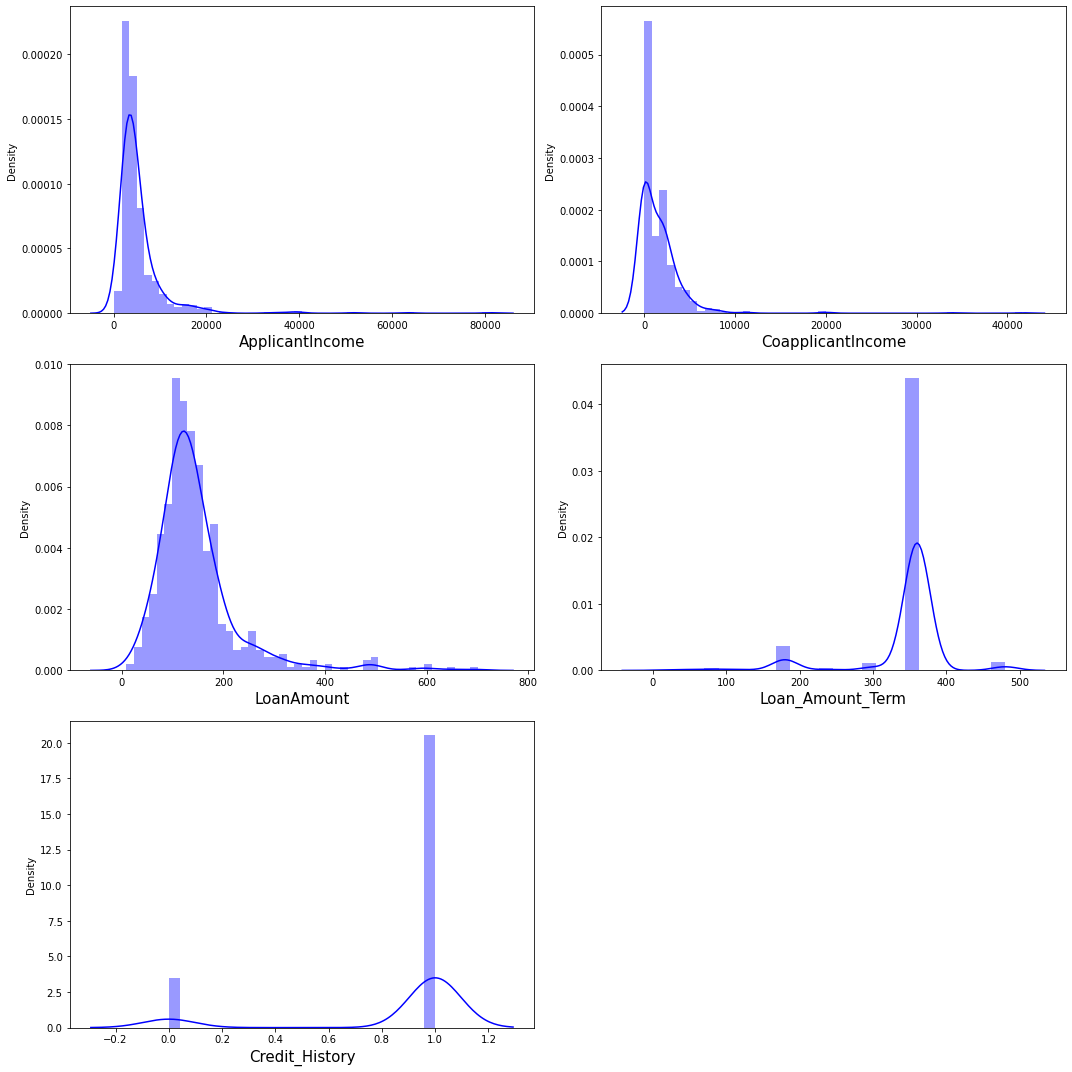

In [25]:
# Checking how the data is distributed:

plt.figure(figsize=(15,15), facecolor='white')
plotnumber=1
for columns in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[columns], color='b')
        plt.xlabel(columns, fontsize=15)
    plotnumber+=1
plt.tight_layout()

* We can clearly identify that the data in the dataset is normal.

### 2. Bivariate Analysis (Checking relation between features and label):

In [26]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

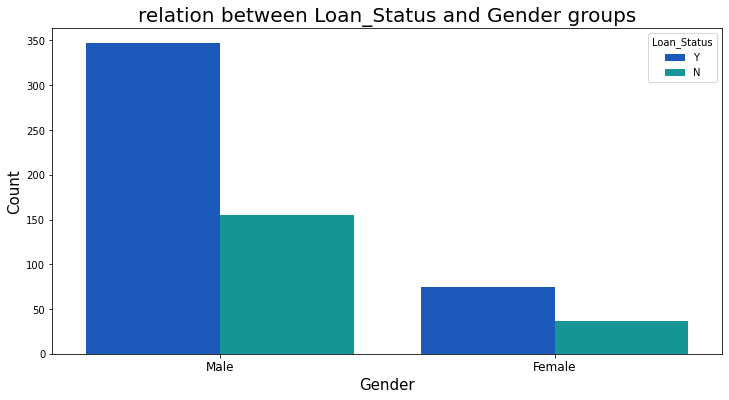

In [27]:
# Visualizing the relation between Loan_Status and Gender groups

plt.figure(figsize = (12,6))
sns.countplot(x = 'Gender' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'winter')

plt.title('relation between Loan_Status and Gender groups',fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

* From above we can observe that Males are getting more Loans as compared to womens.

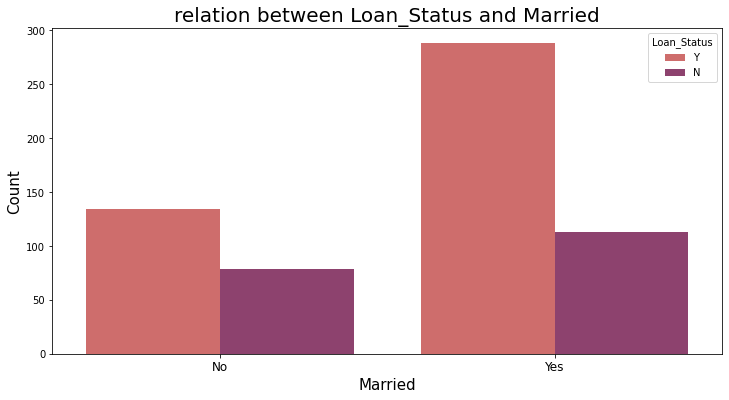

In [28]:
# Visualizing the relation between Loan_Status and Married
plt.figure(figsize = (12,6))
sns.countplot(x = 'Married' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'flare')

plt.title('relation between Loan_Status and Married',fontsize=20)
plt.xlabel('Married',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

* From above we can observe that if someone is married there's more chance for them of getting a Loan.

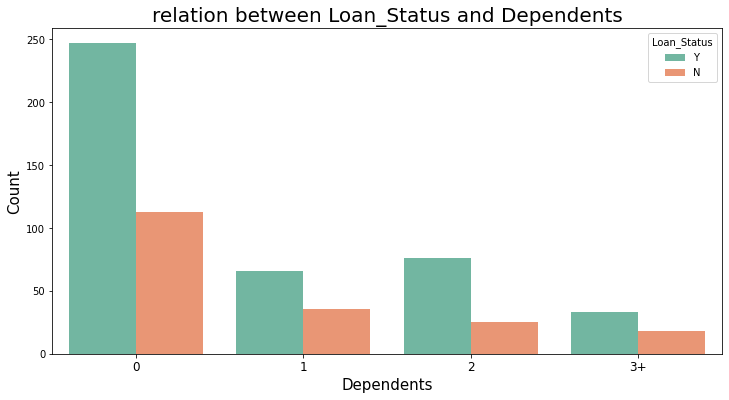

In [29]:
# Visualizing the relation between Loan_Status and Dependents

plt.figure(figsize = (12,6))
sns.countplot(x = 'Dependents' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'Set2')

plt.title('relation between Loan_Status and Dependents',fontsize=20)
plt.xlabel('Dependents',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

* Here we can bserve that if the number of dependents are less , there's more chance of them getting a loan (i.e if dependents are 0 he/she has the highest chance of getting a Loan.

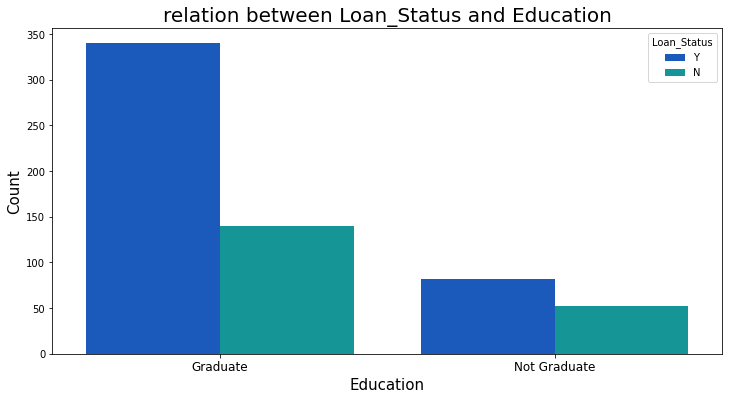

In [30]:
# Visualizing the relation between Loan_Status and Education

plt.figure(figsize = (12,6))
sns.countplot(x = 'Education' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'winter')

plt.title('relation between Loan_Status and Education',fontsize=20)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

* From above we can observe that Graduates has the higher chances of getting a Loan.

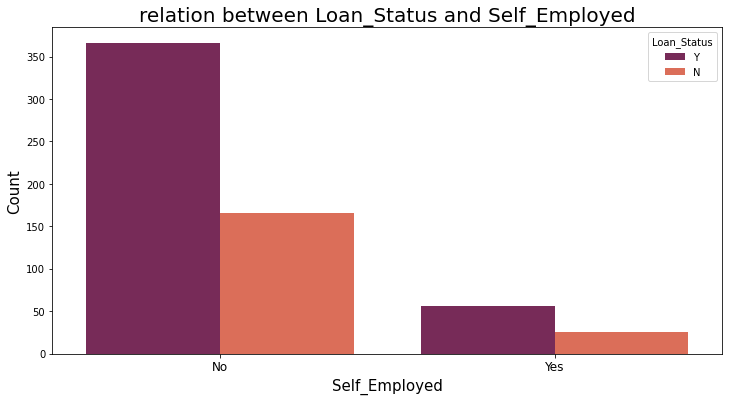

In [31]:
# Visualizing the relation between Loan_Status and Self_Employed

plt.figure(figsize = (12,6))
sns.countplot(x = 'Self_Employed' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'rocket')

plt.title('relation between Loan_Status and Self_Employed',fontsize=20)
plt.xlabel('Self_Employed',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

* We can see that self employeed has less number of loan approvals.

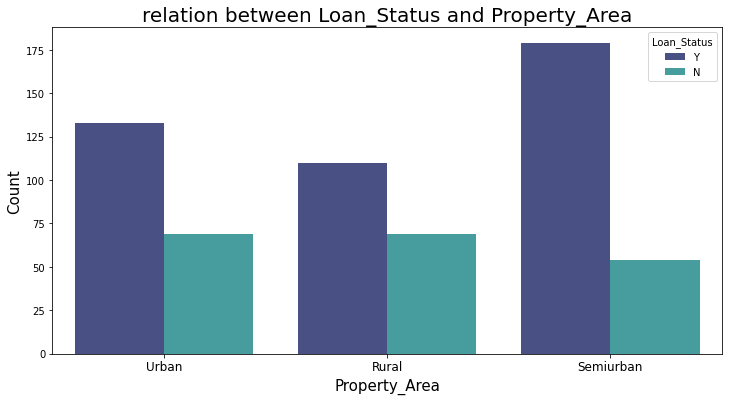

In [32]:
# Visualizing the relation between Loan_Status and Property_Area

plt.figure(figsize = (12,6))
sns.countplot(x = 'Property_Area' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'mako')

plt.title('relation between Loan_Status and Property_Area',fontsize=20)
plt.xlabel('Property_Area',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

* We can see application approval rate is higest in SemiUrban Areas
* Getting Loan according to Property_Area are in this way Semiurban > Urban > Rural.

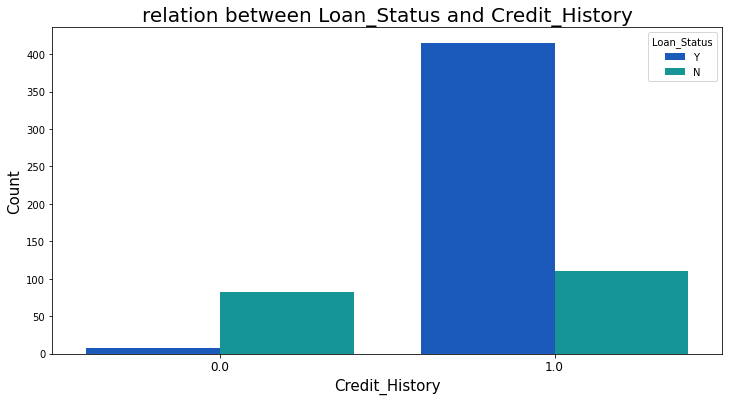

In [33]:
# Visualizing the relation between Loan_Status and Credit_History

plt.figure(figsize = (12,6))
sns.countplot(x = 'Credit_History' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'winter')

plt.title('relation between Loan_Status and Credit_History',fontsize=20)
plt.xlabel('Credit_History',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

* We surely can say load, approval rate is higher with 1 credit history.

**data Preprocessing: part 2**
## Checking for Outliers:

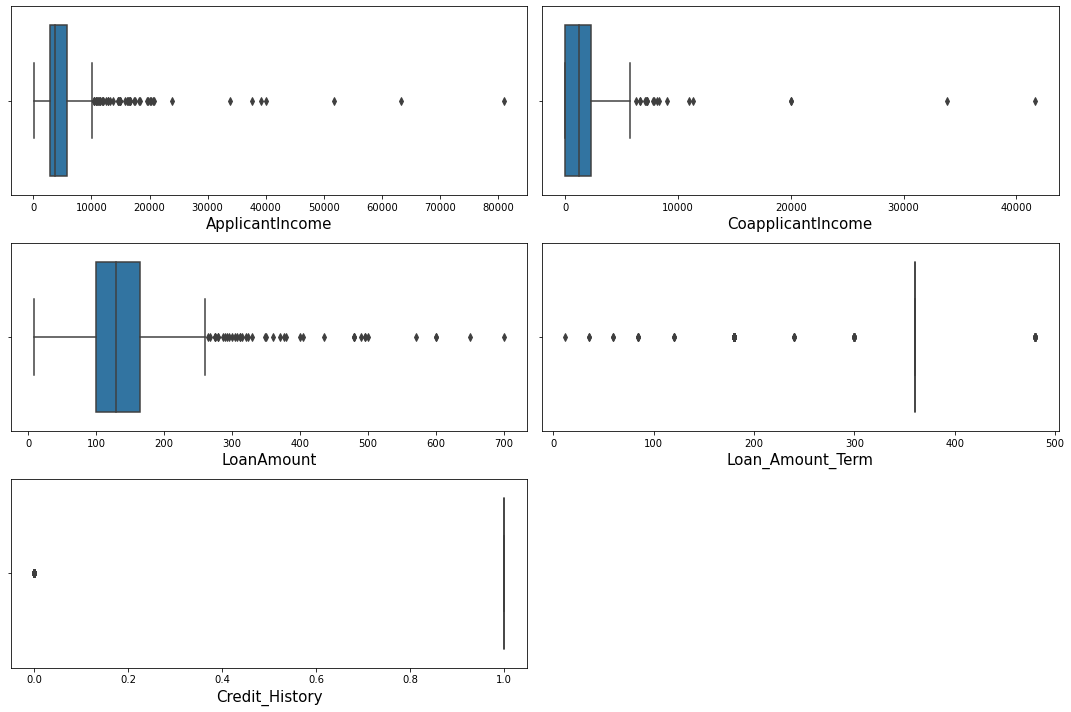

In [34]:
# Identifying the outliers using boxplot for numerical columns:

plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

* The outliers present in all the columns we will remove it using Zscore method.


## Removing outliers : (Data preprocessing)
### 1. ZSCORE method:

In [35]:
numerical_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [36]:
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
z=np.abs(zscore(features))

z

array([[0.07299082, 0.55448733, 0.        , 0.2732313 , 0.41173269],
       [0.13441195, 0.03873155, 0.21927331, 0.2732313 , 0.41173269],
       [0.39374734, 0.55448733, 0.957641  , 0.2732313 , 0.41173269],
       ...,
       [0.43717437, 0.47240418, 1.26937121, 0.2732313 , 0.41173269],
       [0.35706382, 0.55448733, 0.4833669 , 0.2732313 , 0.41173269],
       [0.13441195, 0.55448733, 0.15972753, 0.2732313 , 2.42876026]])

In [37]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


* SO here we can see the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3.


In [38]:
df.shape

(614, 12)

* Before removing outliers we had 614 rows and 12 columns in the dataset.

In [39]:
new_df.shape

(577, 12)

* After removing the outliers we have 577 rows and 12 columns.

In [40]:
# checking the data loss
data_loss = (614-577)/614*100
print(f"""data_loss : {data_loss} %""")

data_loss : 6.026058631921824 %


Here We are losing only 6% of data by removing outliers using zscore. Then remove the outliers and check data loss % by using IQR method.

### 2. IQR METHOD(Inter Quantile Range):

In [41]:
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
df1.shape

(396, 12)

* So we can notice here that after using IQR method data have 396 rows and 12 columns.

In [43]:
# checking the data loss
data_loss = (614-396)/614*100
print(f"""data_loss : {data_loss} %""")

data_loss : 35.50488599348534 %


* We can observe here that using IQR method we are losing 35.5 % of data which is huge. so considering zscore method for better result.

### Encoding the categorical columns using Label Encoding:


In [44]:
new_df['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 577, dtype: object

In [45]:
categorical_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [46]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [47]:
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


* Categorical columns has been encoded and ready for modelling.


### Checking Correlation:

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'Gender'),
  Text(1.5, 0, 'Married'),
  Text(2.5, 0, 'Dependents'),
  Text(3.5, 0, 'Education'),
  Text(4.5, 0, 'Self_Employed'),
  Text(5.5, 0, 'ApplicantIncome'),
  Text(6.5, 0, 'CoapplicantIncome'),
  Text(7.5, 0, 'LoanAmount'),
  Text(8.5, 0, 'Loan_Amount_Term'),
  Text(9.5, 0, 'Credit_History'),
  Text(10.5, 0, 'Property_Area'),
  Text(11.5, 0, 'Loan_Status')])

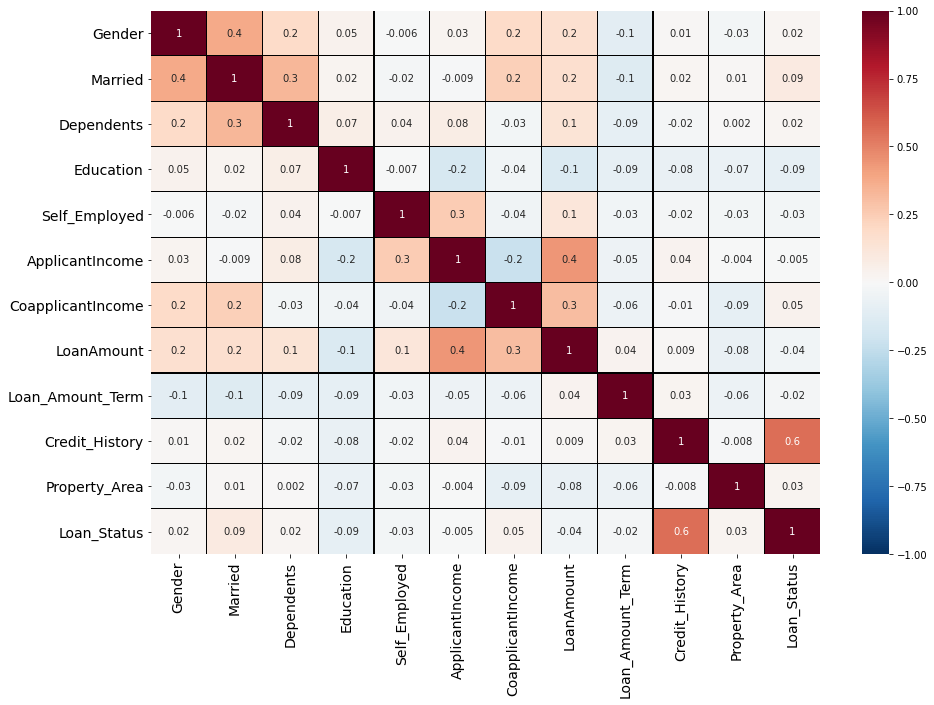

In [48]:
corr=new_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="RdBu_r")
plt.yticks(rotation=0,fontsize = 14)
plt.xticks(fontsize = 14)

It is visible from the heatmap and the table, that the relation of features vs target and features vs features. Also the positive and negative relationship can be seen.
* Here we can see string Positive correlation exists between applicants income and load amount.
* Also our target column is highly postively correlated with Credit history.

### Seperating the features and target:

In [49]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

## Checking the skewness of the dataset:

In [50]:
x.skew().sort_values()

Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Gender              -1.622920
Married             -0.630211
Property_Area       -0.055332
Dependents           1.052106
LoanAmount           1.113132
Education            1.306588
CoapplicantIncome    1.350517
ApplicantIncome      2.148522
Self_Employed        2.252848
dtype: float64

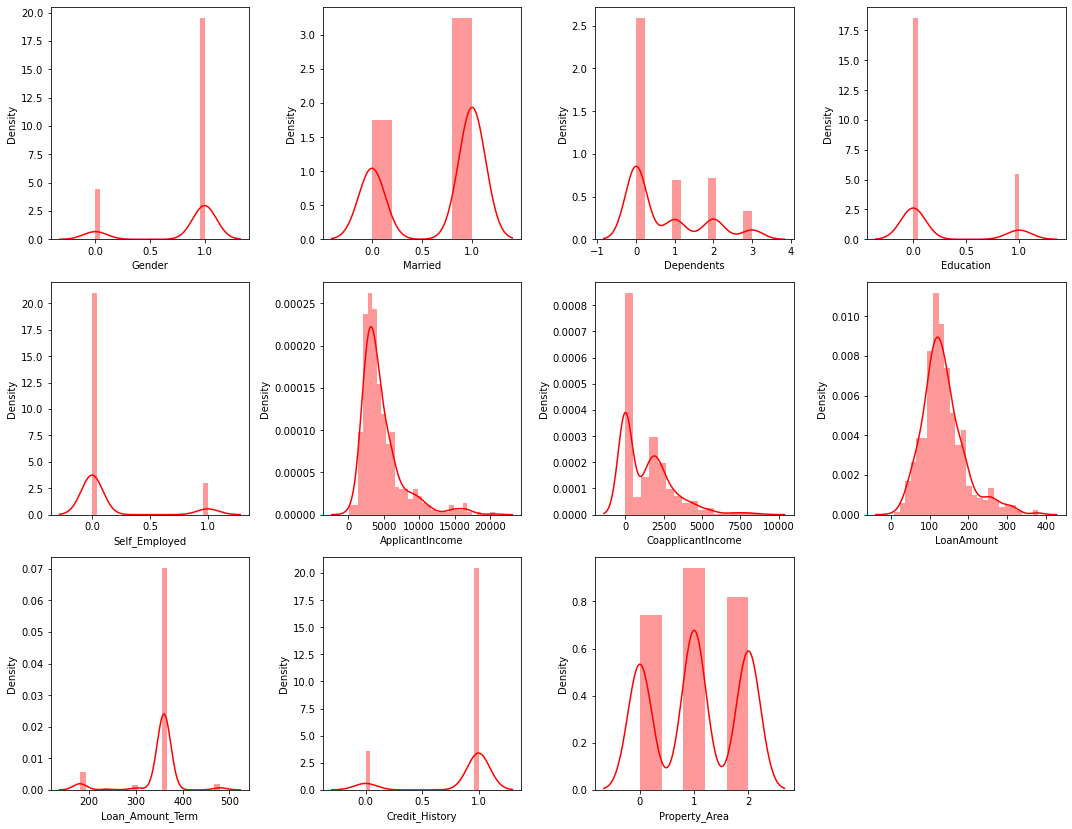

In [51]:
plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(x[column],color = 'r')
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

* We can clearly identify that the data in the dataset is not normal. and have skewness in data.

### Removig the skewness:

In [52]:
# Removing skewness with Power Transformation

from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)

In [53]:
x.skew().sort_values()

Credit_History      -1.976043
Gender              -1.622920
Married             -0.630211
CoapplicantIncome   -0.191876
Property_Area       -0.155094
ApplicantIncome      0.027981
LoanAmount           0.047692
Dependents           0.478360
Loan_Amount_Term     0.727533
Education            1.306588
Self_Employed        2.252848
dtype: float64

* We have successfully removerd skewness from data

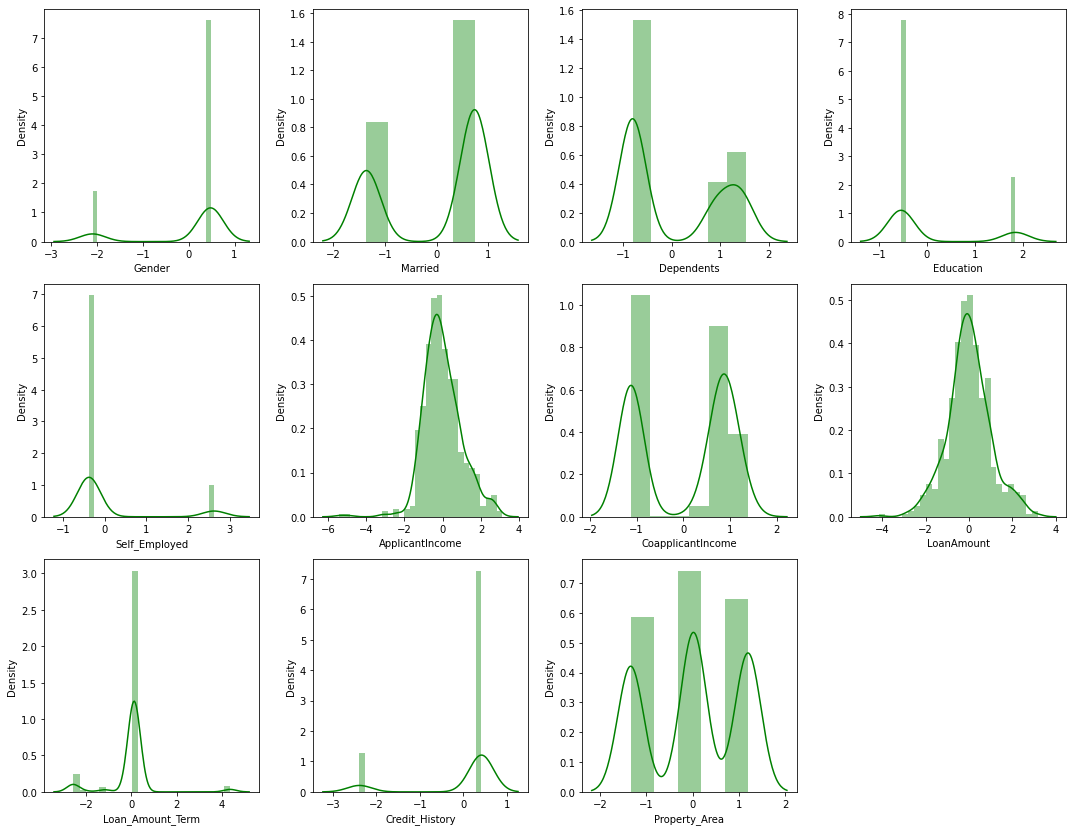

In [54]:
plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(x[column],color='g')
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

* The data looks normalized than before.

### Feature Scaling using Standard Scalarization:

In [55]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.130788,0.418513,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.130788,0.418513,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.130788,0.418513,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.130788,0.418513,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.130788,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.130788,0.418513,-1.340199
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.562700,0.418513,-1.340199
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.130788,0.418513,1.194806
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.130788,0.418513,1.194806


### Oversampling (SMOTE):
* As we have seen earlier that the target variable is imbalanced, lets balance it using SMOTE:

In [56]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [57]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

* **Now our Data is Balanced and ready for Modeling.**

# Modelling:

### Finding best random state:

In [58]:
maxAccu=0
maxRS=0

for i in range(0,500):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.28, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8923766816143498  on Random_state  78


* We got an accuracy score of 89% at a random state of 78.

### Creating Train_Test_Split:

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.28,random_state=maxRS)

## 1. Logistic Regression:

In [60]:
log = LogisticRegression()
log.fit(x_train,y_train)

# Prediction
predlog = log.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predlog)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predlog)}''')
print(classification_report(y_test,predlog))

Accuracy: 77.57847533632287%
Confusion Matrix:
[[ 61  42]
 [  8 112]]
              precision    recall  f1-score   support

           0       0.88      0.59      0.71       103
           1       0.73      0.93      0.82       120

    accuracy                           0.78       223
   macro avg       0.81      0.76      0.76       223
weighted avg       0.80      0.78      0.77       223



* **We got an accuracy score of almost 77.57% with Logistic Regression.**

## 2. Decission Tree Classifier:

In [61]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

# Prediction
preddtc = dtc.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, preddtc)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, preddtc)}''')
print(classification_report(y_test,preddtc))

Accuracy: 79.82062780269058%
Confusion Matrix:
[[83 20]
 [25 95]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       103
           1       0.83      0.79      0.81       120

    accuracy                           0.80       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.80      0.80      0.80       223



* **We got an accuracy score of 79.8% with Decission Tree Classifier model.**

## 3. Random Forest Classifier:

In [64]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

# Prediction
predrfc=rfc.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predrfc)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predrfc)}''')
print(classification_report(y_test,predrfc))

Accuracy: 86.99551569506725%
Confusion Matrix:
[[ 87  16]
 [ 13 107]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       103
           1       0.87      0.89      0.88       120

    accuracy                           0.87       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.87      0.87      0.87       223



* **We got an accuracy score of 87% with Random Forest Classifier model.**

## 4. Stochastic Gradient Descent Classifier (SGD):

In [65]:
# Checking accuracy for SGD Classifier()
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

# Prediction
predsgd = sgd.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predsgd)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predsgd)}''')
print(classification_report(y_test,predsgd))

Accuracy: 69.50672645739911%
Confusion Matrix:
[[69 34]
 [34 86]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       103
           1       0.72      0.72      0.72       120

    accuracy                           0.70       223
   macro avg       0.69      0.69      0.69       223
weighted avg       0.70      0.70      0.70       223



* **We got an accuracy score of 69.50% with KNNeighbors Classifier model.**

## 5. Support Vector Classifier (SVC):

In [66]:
# Checking accuracy for Support Vector Classifier (SVC)
svc=SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predsvc)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predsvc)}''')
print(classification_report(y_test,predsvc))

Accuracy: 78.47533632286996%
Confusion Matrix:
[[ 73  30]
 [ 18 102]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       103
           1       0.77      0.85      0.81       120

    accuracy                           0.78       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.78      0.78       223



* **We got an accuracy score of 78% with Support Vector Classifier (SVC) model.**

## 6. AdaBoostClassifier():

In [67]:
# Checking accuracy for AdaBoostClassifier()
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)

# Prediction
predadb = adb.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predadb)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predadb)}''')
print(classification_report(y_test,predadb))

Accuracy: 80.71748878923766%
Confusion Matrix:
[[ 75  28]
 [ 15 105]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       103
           1       0.79      0.88      0.83       120

    accuracy                           0.81       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



* **We got an accuracy score of 80% with AdaBoostClassifier model.**

## 7. Gradient Boosting Classifier:

In [68]:
# Checking accuracy for Gradient Boosting Classifier.
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

# Prediction
predgbc = gbc.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predgbc)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predgbc)}''')
print(classification_report(y_test,predgbc))

Accuracy: 81.16591928251121%
Confusion Matrix:
[[ 78  25]
 [ 17 103]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       103
           1       0.80      0.86      0.83       120

    accuracy                           0.81       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.81      0.81      0.81       223



* **We got an accuracy score of 81% with AdaBoostClassifier model.**

# Checking the Cross Validation Score:

In [69]:
# 1. cv score for Logistic Regression Classifier
print(cross_val_score(log,x,y,cv=5).mean()*100,"%")

73.24449685534591 %


In [70]:
# 2. cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean()*100,"%")

77.2743710691824 %


In [71]:
# 3. cv score for Random Forest Classifier
print(cross_val_score(rfc,x,y,cv=5).mean()*100,"%")

82.4253144654088 %


In [72]:
# 4. cv score for SGD
print(cross_val_score(sgd,x,y,cv=5).mean()*100,"%")

68.96933962264151 %


In [73]:
# 5. cv score for SVC
print(cross_val_score(svc,x,y,cv=5).mean()*100,"%")

73.625 %


In [74]:
# 6. cv score for AdaBoostClassifier()
print(cross_val_score(adb,x,y,cv=5).mean()*100,"%")

75.01179245283019 %


In [75]:
# 7. cv score for Gradient Boosting Classifier.
print(cross_val_score(gbc,x,y,cv=5).mean()*100,"%")

79.16037735849055 %


Above are the cross validation score for all the models used:
* Our Random Forest Classifier giving the maximum accuracy results. but, 
* The difference between accuracy score and cross validation score of Stochastic Gradient Descent (SGD) Classifier is very less compared to other models.
* So we can conclude that **'Stochastic Gradient Descent (SGD) Classifier' as our best fitting model.**

## Hyper Parameter Tuning:

In [77]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params)

In [78]:
clf.fit(x_train, y_train)
print(clf.best_score_)

0.7154385964912281


In [79]:
print(clf.best_estimator_)

SGDClassifier(alpha=0.1, loss='log', penalty='l1')


* These are the best parameter values.

In [80]:
census = SGDClassifier(alpha=0.1, loss='log', penalty='l1')
census.fit(x_train, y_train)
pred = census.predict(x_test)
acc = accuracy_score(y_test,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 79.82062780269058 %


* The accuracy of the best model after tuning 79.82 %.

## Plotting ROC and Compare AUC for the best model:

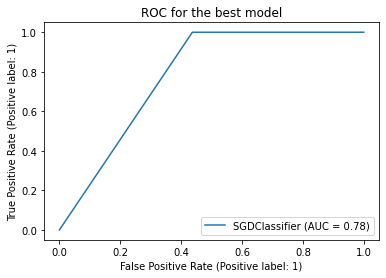

In [81]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(census, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

## Saving The Model:

In [82]:
import joblib
joblib.dump(census,"Census Loan Application Status Prediction.pkl")

['Census Income Project.pkl']

# Conclusion :-
* 'Credit_History' has the highest importance in predicting 'Loan_Status', followed by 'ApplicantIncome', 'LoanAmount'.
* Our Random Forest Classifier giving the maximum accuracy results. but, 
* The difference between accuracy score and cross validation score of Stochastic Gradient Descent (SGD) Classifier is very less compared to other models.
* So we can conclude that **'Stochastic Gradient Descent (SGD) Classifier' as our best fitting model.**
* The final Accuracy for the prediction of 'Loan Application Status' (whether the loan of the applicant will be approved or not.) using Classification algorithm is = 79% after tuning.
